# OpenWeatherMap API

In [1]:
# Imports
import datetime as dt
import requests
import json

## Current weather
### Common definitions to use for all requests

In [10]:
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
API_KEY = open('../No_sync/api_key_OpenWeather','r').read()
CITY = "Ski" # Implicit geocoding is deprecated.

url = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request current weather in chosen city

In [11]:
response = requests.get(url).json()
print(response)

{'coord': {'lon': 10.8358, 'lat': 59.7195}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 275.81, 'feels_like': 275.81, 'temp_min': 275.81, 'temp_max': 276.11, 'pressure': 1013, 'humidity': 91, 'sea_level': 1013, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 0.56, 'deg': 74, 'gust': 1}, 'clouds': {'all': 100}, 'dt': 1761909392, 'sys': {'type': 2, 'id': 2006772, 'country': 'NO', 'sunrise': 1761892503, 'sunset': 1761924320}, 'timezone': 3600, 'id': 3139081, 'name': 'Ski', 'cod': 200}


In [13]:
# Write JSON to file for viewing
with open('downloads/weather.json', 'w') as f:
    json.dump(response, f, indent=4)

## Conversion functions
Changing scales can make results more interpretable

In [14]:
# Kelvin to Celsius
def kelvin_to_celsius(temp):
    return temp - 273.15

# Meters per second to knots
def mps_to_knots(speed):
    return speed * 1.943844

## Print some weather properties

In [15]:
# Current temperature
temp_kelvin = response['main']['temp']
temp_celsius = kelvin_to_celsius(temp_kelvin)
print(f"The current temperature in {CITY} is {temp_celsius:.1f} °C")

The current temperature in Ski is 2.7 °C


In [16]:
# Sunrise and sunset today in local time
sunrise = dt.datetime.fromtimestamp(response['sys']['sunrise'])
sunset = dt.datetime.fromtimestamp(response['sys']['sunset'])
print(f"Sunrise today is at {sunrise:%H:%M} and sunset is at {sunset:%H:%M}")

Sunrise today is at 07:35 and sunset is at 16:25


In [17]:
# Wind direction and speed
wind_knots = mps_to_knots(response['wind']['speed'])
print(f"Wind today is from {response['wind']['deg']}° at {round(wind_knots,1)} knots")

Wind today is from 74° at 1.1 knots


## Forecasted weather
### Common definitions to use for all requests

In [35]:
BASE_URL = "https://api.openweathermap.org/data/2.5/forecast?"
CITY = "Mo i Rana"

urlF = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request forecasted weather in chosen city

In [36]:
responseF = requests.get(urlF).json()
#print(json.dumps(responseF, indent=4))
print(responseF)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1761922800, 'main': {'temp': 271.41, 'feels_like': 268.76, 'temp_min': 271.41, 'temp_max': 274.63, 'pressure': 1016, 'sea_level': 1016, 'grnd_level': 963, 'humidity': 93, 'temp_kf': -3.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'clouds': {'all': 0}, 'wind': {'speed': 1.93, 'deg': 68, 'gust': 1.86}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2025-10-31 15:00:00'}, {'dt': 1761933600, 'main': {'temp': 272.06, 'feels_like': 269.15, 'temp_min': 272.06, 'temp_max': 273.35, 'pressure': 1016, 'sea_level': 1016, 'grnd_level': 963, 'humidity': 90, 'temp_kf': -1.29}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'clouds': {'all': 28}, 'wind': {'speed': 2.22, 'deg': 84, 'gust': 2.17}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2025-10-31 18:00:00'}, {'dt': 1761944400, 'main': {'temp': 272.74, 'feels_like': 26

In [37]:
# Write JSON to file for viewing
with open('downloads/forecast.json', 'w') as f:
    json.dump(responseF, f, indent=4)

### When and what?
Check contents and time stamps

In [38]:
# Content of responseF
responseF.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [39]:
# Number of forecasts
print(len(responseF["list"]))

40


In [40]:
# Print forecast times
for forecast in responseF["list"]:
    print(forecast["dt_txt"])

2025-10-31 15:00:00
2025-10-31 18:00:00
2025-10-31 21:00:00
2025-11-01 00:00:00
2025-11-01 03:00:00
2025-11-01 06:00:00
2025-11-01 09:00:00
2025-11-01 12:00:00
2025-11-01 15:00:00
2025-11-01 18:00:00
2025-11-01 21:00:00
2025-11-02 00:00:00
2025-11-02 03:00:00
2025-11-02 06:00:00
2025-11-02 09:00:00
2025-11-02 12:00:00
2025-11-02 15:00:00
2025-11-02 18:00:00
2025-11-02 21:00:00
2025-11-03 00:00:00
2025-11-03 03:00:00
2025-11-03 06:00:00
2025-11-03 09:00:00
2025-11-03 12:00:00
2025-11-03 15:00:00
2025-11-03 18:00:00
2025-11-03 21:00:00
2025-11-04 00:00:00
2025-11-04 03:00:00
2025-11-04 06:00:00
2025-11-04 09:00:00
2025-11-04 12:00:00
2025-11-04 15:00:00
2025-11-04 18:00:00
2025-11-04 21:00:00
2025-11-05 00:00:00
2025-11-05 03:00:00
2025-11-05 06:00:00
2025-11-05 09:00:00
2025-11-05 12:00:00


## Make plots of omnipresent measurements and events
We will later look at missing data, data only sporadically appearing and so on.

In [41]:
# Air pressure per period
pressures = []
timestamps = []
for forecast in responseF["list"]:
    pressures.append(forecast["main"]["pressure"])
    timestamps.append(dt.datetime.fromtimestamp(forecast["dt"]))

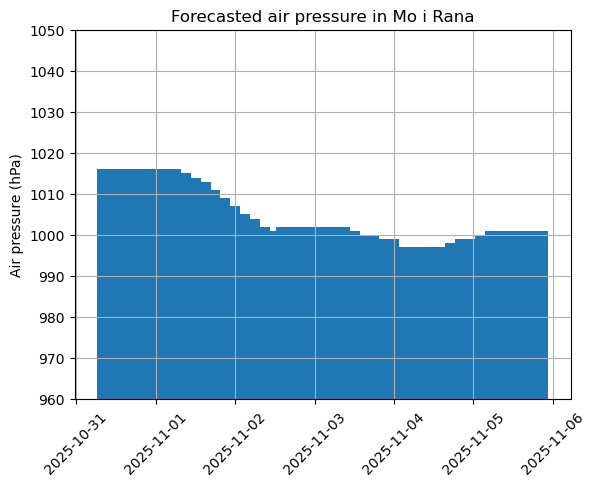

In [42]:
import matplotlib.pyplot as plt
plt.bar(timestamps, pressures)
plt.xticks(rotation=45)
plt.ylim(960, 1050)
plt.grid()
plt.ylabel("Air pressure (hPa)")
plt.title(f"Forecasted air pressure in {CITY}")
plt.show()

### Exercise with home town 

In [46]:
BASE_URL = "https://api.openweathermap.org/data/2.5/forecast?"
CITY = "Kolbotn"

url_home = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

In [47]:
response_home = requests.get(url_home).json()
#print(json.dumps(responseF, indent=4))
print(response_home)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1761922800, 'main': {'temp': 275.97, 'feels_like': 275.97, 'temp_min': 275.97, 'temp_max': 276.44, 'pressure': 1015, 'sea_level': 1015, 'grnd_level': 995, 'humidity': 85, 'temp_kf': -0.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 100}, 'wind': {'speed': 0.68, 'deg': 73, 'gust': 0.59}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2025-10-31 15:00:00'}, {'dt': 1761933600, 'main': {'temp': 275.44, 'feels_like': 275.44, 'temp_min': 274.37, 'temp_max': 275.44, 'pressure': 1015, 'sea_level': 1015, 'grnd_level': 995, 'humidity': 87, 'temp_kf': 1.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'clouds': {'all': 87}, 'wind': {'speed': 0.53, 'deg': 67, 'gust': 0.46}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2025-10-31 18:00:00'}, {'dt': 1761944400, 'main': {'temp': 274.43, 'feels_li

In [48]:
# Content of responseF
print(response_home.keys())
# Number of forecasts
print(len(response_home["list"]))
# Print forecast times
for forecast in response_home["list"]:
    print(forecast["dt_txt"])

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])
40
2025-10-31 15:00:00
2025-10-31 18:00:00
2025-10-31 21:00:00
2025-11-01 00:00:00
2025-11-01 03:00:00
2025-11-01 06:00:00
2025-11-01 09:00:00
2025-11-01 12:00:00
2025-11-01 15:00:00
2025-11-01 18:00:00
2025-11-01 21:00:00
2025-11-02 00:00:00
2025-11-02 03:00:00
2025-11-02 06:00:00
2025-11-02 09:00:00
2025-11-02 12:00:00
2025-11-02 15:00:00
2025-11-02 18:00:00
2025-11-02 21:00:00
2025-11-03 00:00:00
2025-11-03 03:00:00
2025-11-03 06:00:00
2025-11-03 09:00:00
2025-11-03 12:00:00
2025-11-03 15:00:00
2025-11-03 18:00:00
2025-11-03 21:00:00
2025-11-04 00:00:00
2025-11-04 03:00:00
2025-11-04 06:00:00
2025-11-04 09:00:00
2025-11-04 12:00:00
2025-11-04 15:00:00
2025-11-04 18:00:00
2025-11-04 21:00:00
2025-11-05 00:00:00
2025-11-05 03:00:00
2025-11-05 06:00:00
2025-11-05 09:00:00
2025-11-05 12:00:00


In [51]:
# Humidity per period
humidity = []
timestamps = []
for forecast in response_home["list"]:
    humidity.append(forecast["main"]["humidity"])
    timestamps.append(dt.datetime.fromtimestamp(forecast["dt"]))

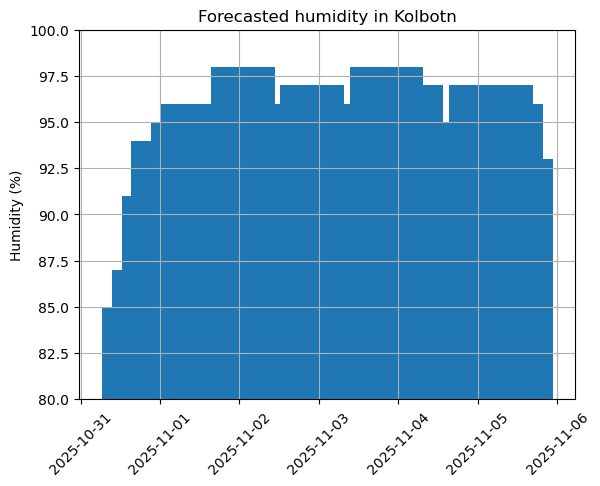

In [55]:
import matplotlib.pyplot as plt
plt.bar(timestamps, humidity)
plt.xticks(rotation=45)
plt.ylim(80, 100)
plt.grid()
plt.ylabel("Humidity (%)")
plt.title(f"Forecasted humidity in {CITY}")
plt.show()